# Seaborn

Seaborn is a wrapper around matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the seed for the random number generator, which let's us reproduce the data
np.random.seed(1234)

# make a panda series v1 with 1000 numbers drawn from 
# a normal distribution with a mean of 0 and a std of 10
v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

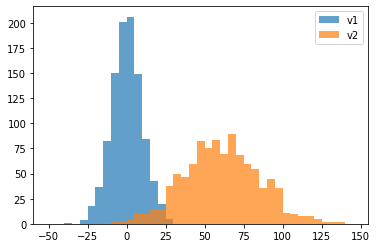

In [3]:
# plot histograms of v1 and v2 side by side
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
# alpha set so the histograms don't cover one another up
# for the bin parameter instead of integer we use 
# a sequence to specify the bins we want to use
plt.legend();

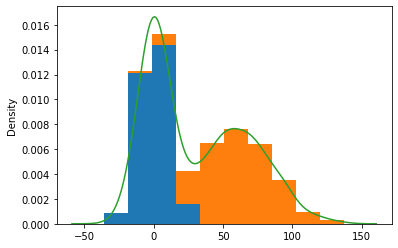

In [4]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
# `density` - in older versions `normed`
v3 = np.concatenate((v1,v2))
# we use v3 to plot a kernel density estimate plot over the stacked histogram
sns.kdeplot(v3);

The kernel density estimation plot estimates the probability density function of the variable v3.  
Plotting it on top of the stacked histograms of v1 and v2 allows us to see the relationship between these two visualizations.  
Seaborn provides a convenient function for this type of plots - `sns.distplot`

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


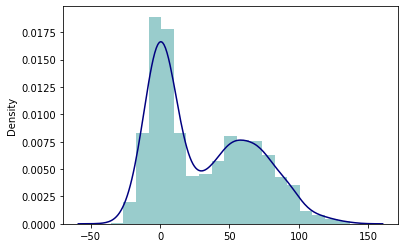

In [5]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

The jointplot creates a scatterplot along the histograms for each individual variable on each axis (plot from `assignment_1_weather_pattern.ipynb` is a jointplot)

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


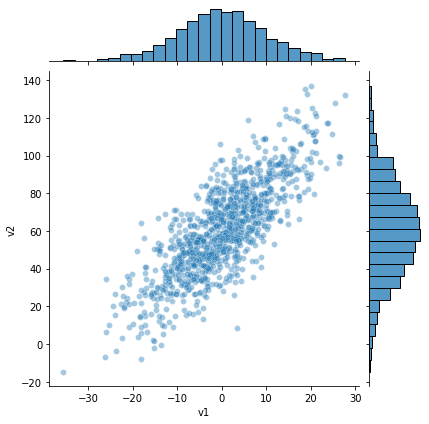

In [6]:
sns.jointplot(v1, v2, alpha=0.4);

The jointplot allows us to visualize the distribution of the two variables individually, as well as relationships beween the variables.  
We can see that v1 and v2 appear to be normally distributed variables that are positively correlated

Some of the plotting functions in seaborn return a matplotlib axis object, while others operate on an entire figure and produce plots with several panels, returning a seaborn grid object. In both cases, matplotlib can be used to further tweak the plots.

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


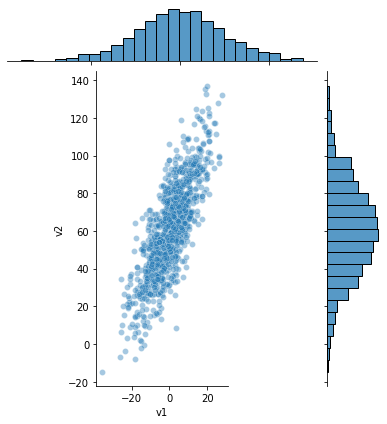

In [7]:
grid = sns.jointplot(v1, v2, alpha=0.4);
# from seaborn grid object we can plot a map plot axis subplot object, using `grid.ax_joint``
grid.ax_joint.set_aspect('equal')
# aspect ration set to 'equal'

### Hexbin Plots

Hexbin plots are the bivariate counterpart to histograms. They show the number of observations that fall within hexagonal bins.  
The hexbin style of plot works well with relatively large data sets.

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


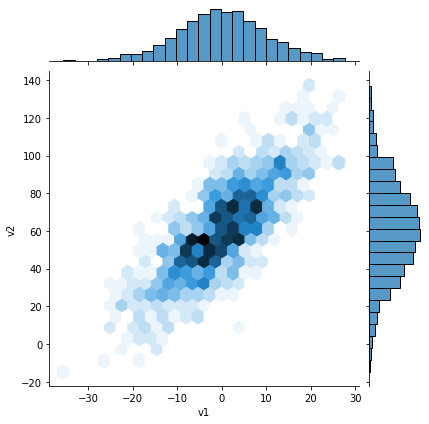

In [8]:
sns.jointplot(v1, v2, kind='hex');

### KDE (Kernel Density Estimations) Plots

Another good option for visualizing the distribution of data sets is kernel density estimations (KDE) plots.  
You can think of 2-dim KDE plots as the continuous version of the hexbin jointplot.

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


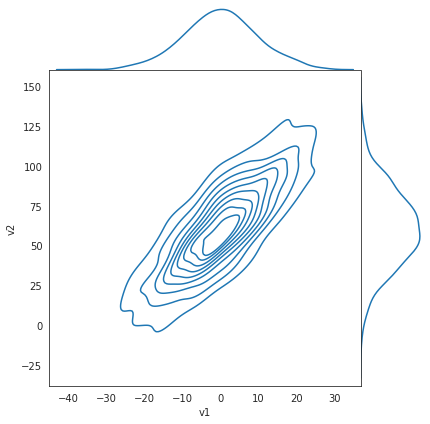

In [9]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);
# space=0 to plot the marginal distributions directly on the border of the scatterplot

### Scatterplot Matrix

In [10]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Seaborn has a built in function that creates a scatterplot matrix.

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


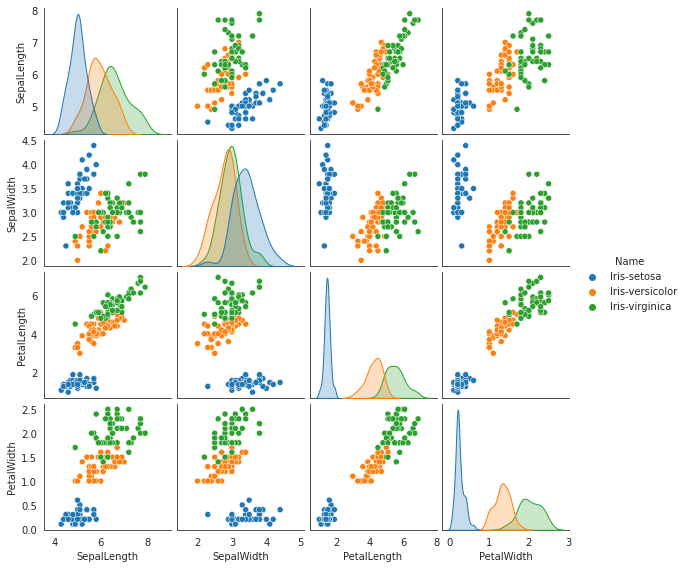

In [11]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);
# hue='Name' to map name to different colors
# diag_kind='kde' to use a kde along the diagonals instead of the default histograms

There are some clusters in the data set. It looks like peddle length and peddle width are good options for separating the observations, whereas sepal width is not a strong separator. 

### Swarm Plot, Violin Plot

Violin plot is something like more informative version of a box plot.  
Let's plot a violin plot next to a swarm plot, which is something like a scatter plot for categorical data.

/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/asdf/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

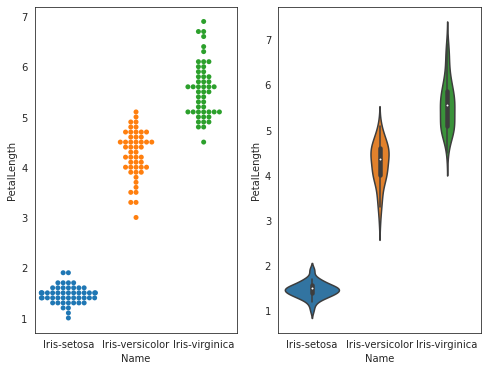

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

On the swarmplot each species has its own column and each observation's petal length is shown with more common values appearing as the wide parts of the cluster, much like a histogram.  

The violin plot is like box plot with a rotated kernel density estimation on each side.  
  
Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that boxplots are unable to convey, such as multi modality.

### Spurious Correlations  
(not related to seaborn)

The [spurious correlations](http://www.tylervigen.com/spurious-correlations) website lists a number of correlations which exist but seem unlikely to be causally related to one another. 